In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from nltk import FreqDist
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,40)
import matplotlib.pyplot as plt
sns.set_palette("pastel")
import ast
import networkx as nx


In [2]:
df = pd.read_csv("/Users/shashanksingh/Desktop/India_air/AIR_POLLUTION/01_DATA/processed_data/air_pollution_cases_mapped_to_judge_vecs_with_clustered_judge_names_including_manual.csv")

In [3]:
df.head()

,Unnamed: 0,lsa_vec1,lsa_vec2,lsa_vec3,lsa_vec4,lsa_vec5,lsa_vec6,lsa_vec7,lsa_vec8,lsa_vec9,lsa_vec10,lsa_vec11,lsa_vec12,lsa_vec13,lsa_vec14,lsa_vec15,lsa_vec16,lsa_vec17,lsa_vec18,lsa_vec19,lsa_vec20,lsa_vec21,lsa_vec22,lsa_vec23,lsa_vec24,lsa_vec25,d2v_vec1,d2v_vec2,d2v_vec3,d2v_vec4,d2v_vec5,d2v_vec6,d2v_vec7,d2v_vec8,d2v_vec9,d2v_vec10,d2v_vec11,d2v_vec12,d2v_vec13,d2v_vec14,d2v_vec15,d2v_vec16,d2v_vec17,d2v_vec18,d2v_vec19,d2v_vec20,d2v_vec21,d2v_vec22,d2v_vec23,d2v_vec24,d2v_vec25,kanoon_id,judges,matched_judges
0,0,0.206468,-0.009350,-0.101339,-0.022926,0.164733,0.026036,-0.058488,0.016707,-0.041115,0.051153,-0.000261,-0.011314,0.029214,0.024956,-0.056498,-0.007493,0.049778,0.062894,-0.030604,0.031899,-0.017824,-0.004689,-0.000461,-0.022878,-0.020514,0.762160,-0.304317,-0.134450,1.691743,0.390013,-2.177599,-0.624573,0.011979,-0.280478,0.518096,-1.229518,-0.080525,0.599395,0.816370,-0.710094,-1.174462,-0.977731,2.245780,0.522577,0.520866,1.079955,-1.502817,-1.054845,0.198198,0.707225,188559769.0,"['n balasubramanian', 'r banumathi']","[""['balasubramanian', 'balasubramaniyan', 'm b..."
1,1,0.202379,-0.017090,-0.094108,-0.073125,0.104959,-0.029454,-0.000455,-0.012366,-0.012143,0.029293,0.008071,-0.020970,-0.000915,0.063642,-0.092313,0.000231,0.095749,0.064430,-0.042003,0.048018,-0.004041,-0.018820,-0.014113,0.005949,-0.004532,0.471382,-0.006196,0.093502,1.660367,0.471368,-2.101554,-0.708078,-0.520927,-0.240713,0.531644,-0.929118,-0.427787,0.402170,0.800092,-0.705289,-1.212418,-1.023941,1.680498,0.212273,0.021009,0.932837,-1.209812,-1.018462,0.275607,0.186884,904272.0,"['m katju', 'n balasubramanian']","[""['m katju']"", ""['balasubramanian', 'balasubr..."
2,2,0.232409,-0.008515,-0.131364,-0.040050,0.174740,0.004260,-0.082347,0.018180,0.048840,-0.073765,-0.006064,-0.016932,0.023200,0.001904,-0.006728,-0.016638,0.033272,0.026230,-0.012927,0.014598,-0.022028,-0.005323,-0.014503,-0.035532,-0.008101,1.383087,-1.027188,-0.410071,1.380256,0.777553,-0.934555,-0.110360,0.913388,-0.747904,0.388840,-0.340484,0.104627,0.360255,-0.260030,-0.323633,-0.801314,-1.212103,2.053529,-0.518379,0.823549,0.897118,-1.540359,-1.107986,-0.726739,0.384828,199610.0,"['m karpagavinayagam', 'c nagappan']","[""['karpagavinayagam', 'm kapagavinayagam', 'm..."
3,3,0.251850,-0.018103,-0.108481,-0.095848,0.169875,-0.035165,-0.014409,-0.013018,0.066533,-0.022149,-0.010454,-0.019487,0.004391,0.033534,-0.045236,-0.005567,0.061797,0.027176,-0.029472,0.015830,-0.017235,-0.009657,-0.026167,-0.029075,0.001188,0.849636,-0.711100,-0.532919,1.854672,0.854195,-1.265600,-0.542707,0.569638,-0.337131,-0.314742,-0.881094,-0.294400,-0.135900,0.304333,-0.170053,-0.707562,-1.255474,2.081203,-0.149409,0.685713,1.134838,-2.033919,-1.795850,-0.317975,0.395685,37063633.0,"['p sathasivam', 'a ramalingam']","[""['p sathasiva', 'p sathasivam', 'p sathasvia..."
4,4,0.206468,-0.009350,-0.101339,-0.022926,0.164733,0.026036,-0.058488,0.016707,-0.041115,0.051153,-0.000261,-0.011314,0.029214,0.024956,-0.056498,-0.007493,0.049778,0.062894,-0.030604,0.031899,-0.017824,-0.004689,-0.000461,-0.022878,-0.020514,0.762160,-0.304317,-0.134450,1.691743,0.390013,-2.177599,-0.624573,0.011979,-0.280478,0.518096,-1.229518,-0.080525,0.599395,0.816370,-0.710094,-1.174462,-0.977731,2.245780,0.522577,0.520866,1.079955,-1.502817,-1.054845,0.198198,0.707225,680752.0,"['n balasubramanian', 'r banumathi']","[""['balasubramanian', 'balasubramaniyan', 'm b..."


In [4]:
root = "/Users/shashanksingh/Desktop/India_air/AIR_POLLUTION/01_DATA/processed_data/"
figures = "/Users/shashanksingh/Desktop/India_air/github/india_air_pollution/results/descriptive_paper/figures/"
tables = "/Users/shashanksingh/Desktop/India_air/github/india_air_pollution/results/descriptive_paper/tables/"
raw = "/Users/shashanksingh/Desktop/India_air/AIR_POLLUTION/01_DATA/RAW_DATA/Law/"

df_cases_cleaned = pd.read_csv(root+"case_data_final_with_additional_variables.csv")
df_citations = pd.read_csv(raw+"cites_air_cases.csv")

df_cases_cleaned = pd.merge(df_cases_cleaned, df_citations,left_on = "Kanoon_ID" ,right_on = "kanoon_id", how='left')

In [5]:
len(df)

1379

In [6]:
d2v_vars = [ele for ele in list(df.columns) if "d2v" in ele]

In [7]:
df_merged = pd.merge(df_cases_cleaned, df, left_on = "Kanoon_ID" ,right_on = "kanoon_id", how='left')

In [8]:
df_merged = df_merged[df_merged["d2v_vec15"].notnull()]

In [9]:
len(df_merged)

1379

In [10]:
doc_tags = list(df_merged["Kanoon_ID"])
tsne = TSNE(n_components=2,
            n_iter=10000,
            n_iter_without_progress = 1000,
            verbose = 1,
            learning_rate = 100,
            perplexity = 10)
X = df_merged[d2v_vars]
X_tsne = tsne.fit_transform(X)

/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1379 samples in 0.000s...
[t-SNE] Computed neighbors for 1379 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1379
[t-SNE] Computed conditional probabilities for sample 1379 / 1379
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.805969
[t-SNE] KL divergence after 10000 iterations: 0.516074


In [11]:
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

In [12]:
df = df.reset_index(drop=False)

In [13]:
df["kanoon_id"] = df["index"]

In [14]:
df_to_plot = pd.merge(df, df_cases_cleaned, right_on = "Kanoon_ID", left_on = "kanoon_id", how = "left")
df_to_plot["importance_score_dummy"] = df_to_plot["importance_score"].apply(lambda x : 1 if x>0 else 0)
df_to_plot["green_dummy"] = df_to_plot["mean_coded_vals"].apply(lambda x : 1 if x>0 else 0)

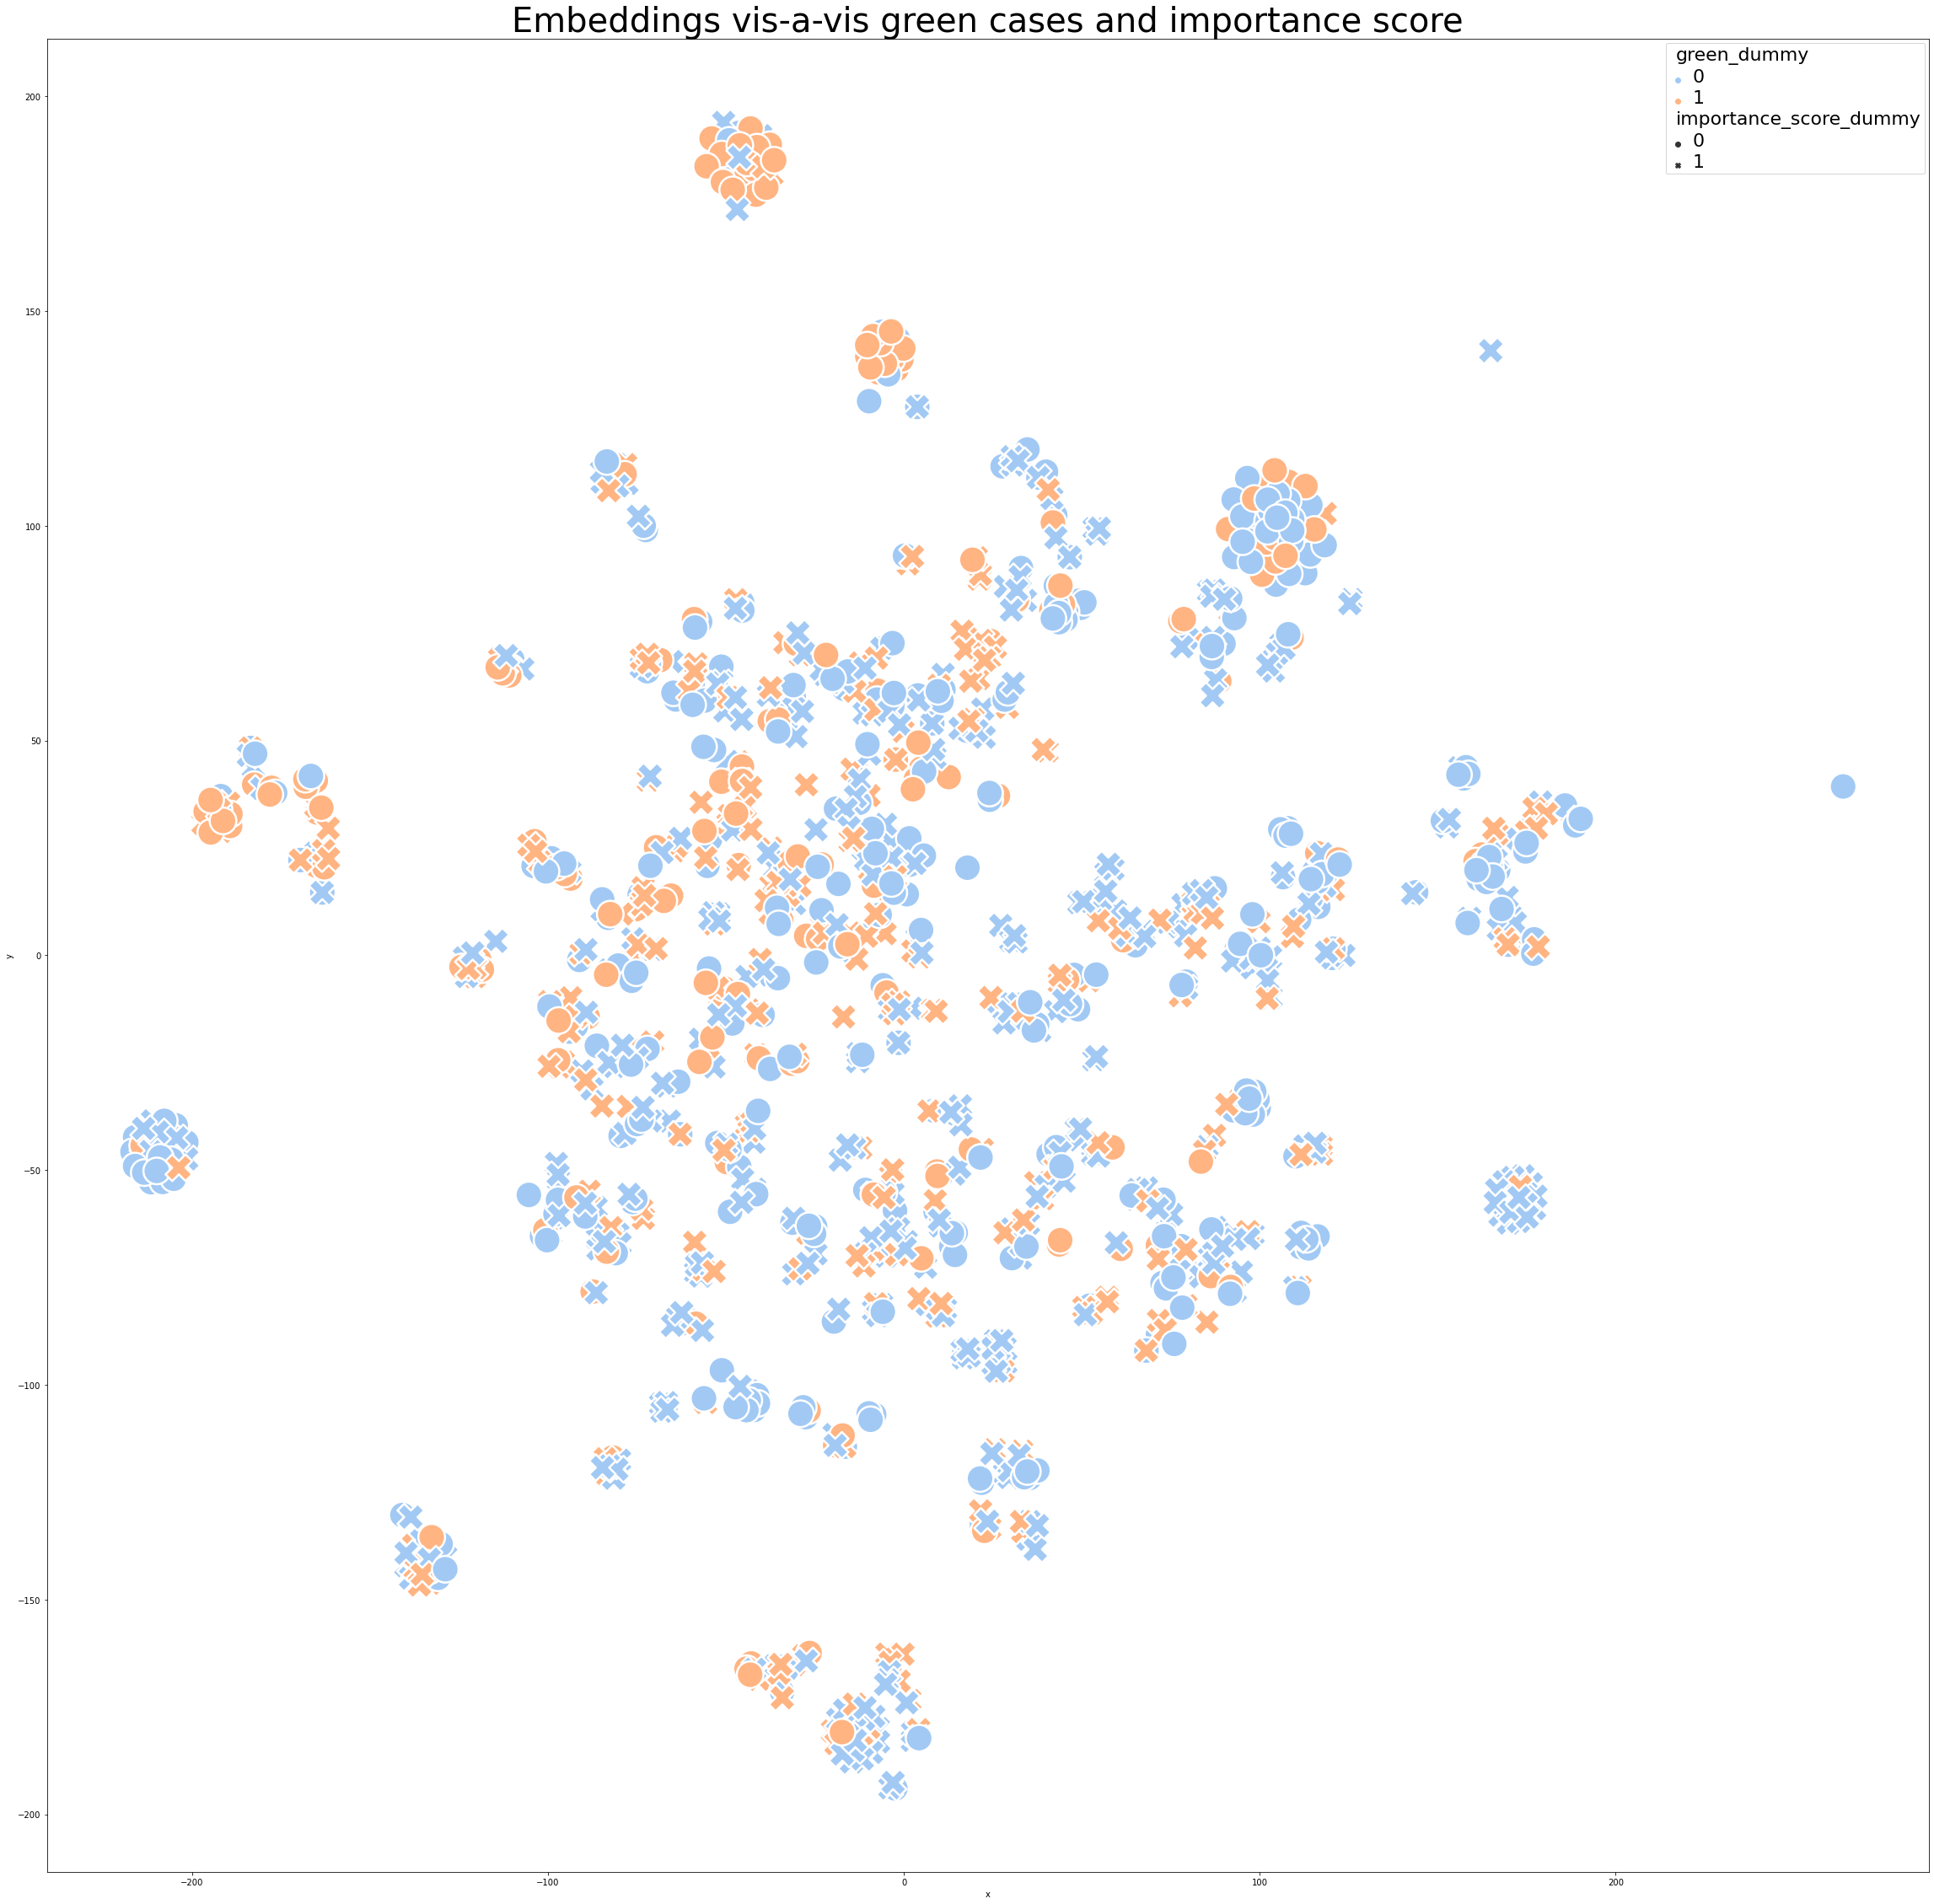

In [33]:
ax=sns.scatterplot(data=df_to_plot, x="x", y="y", hue="green_dummy", style = "importance_score_dummy", s=1000, legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.title("Embeddings vis-a-vis green cases and importance score",fontsize = 40)
plt.savefig(figures+"embeddings_green_cases.jpg",bbox_inches='tight')
plt.show()

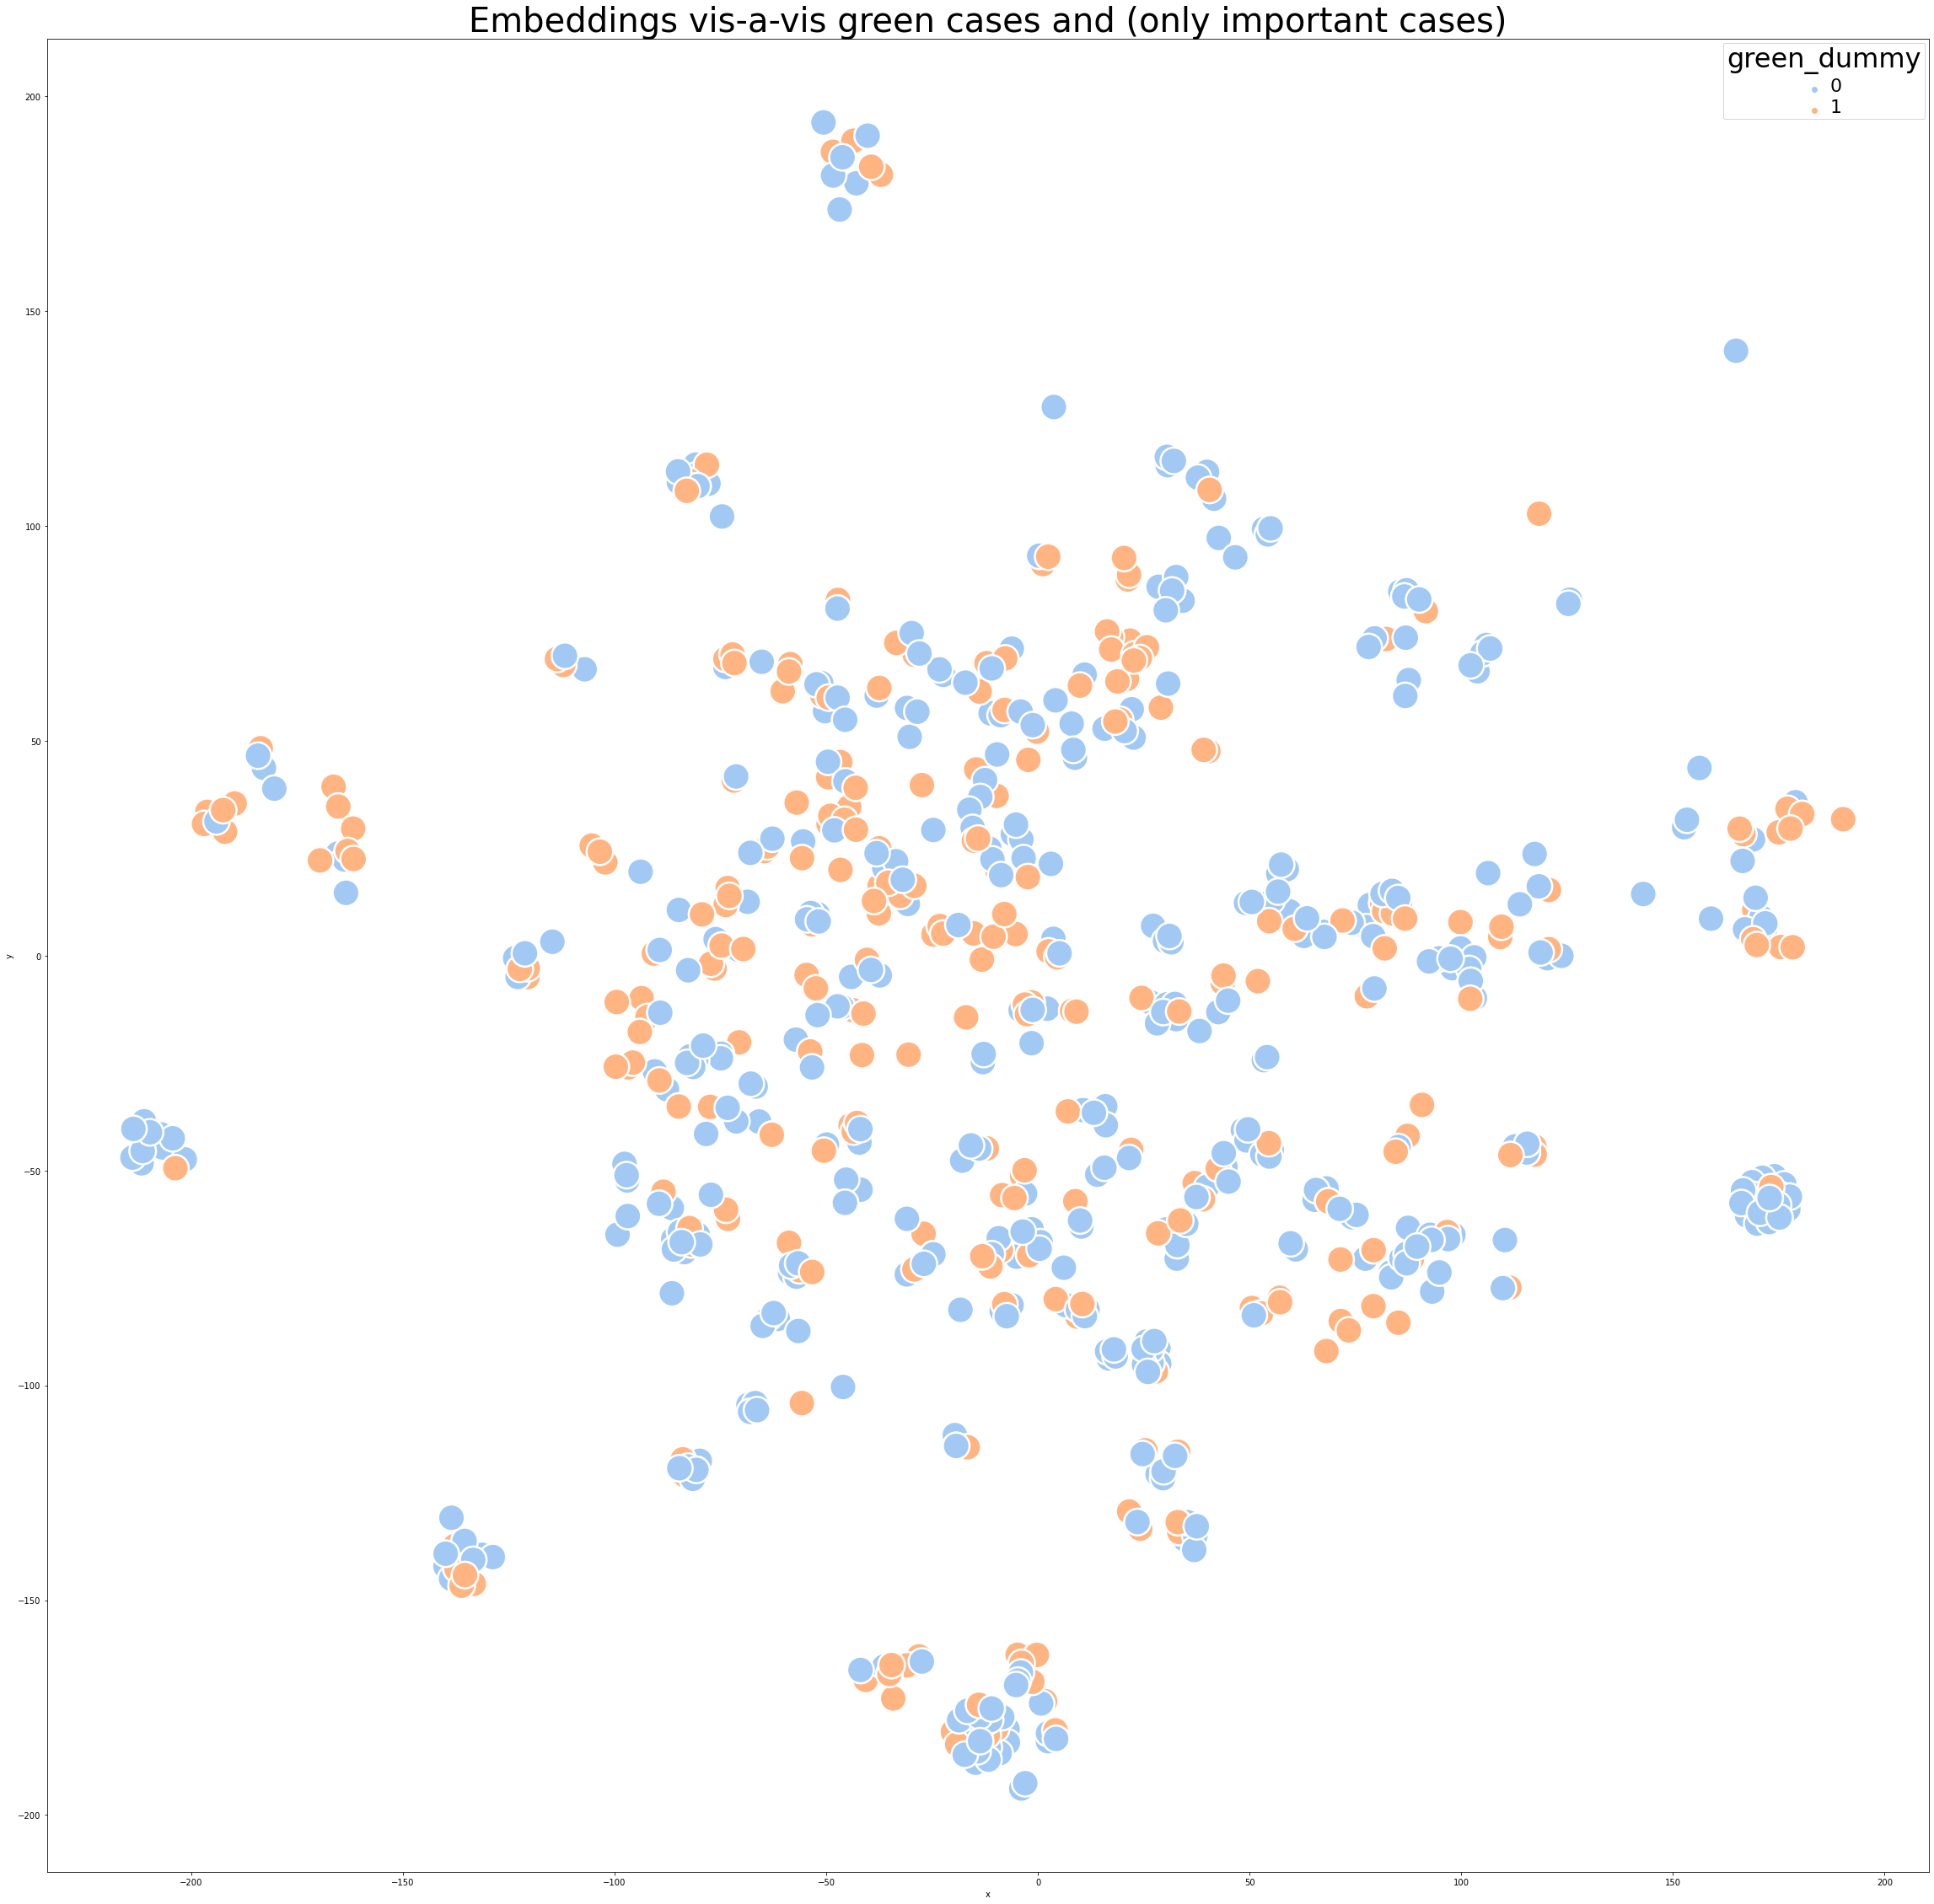

In [35]:
ax=sns.scatterplot(data=df_to_plot[df_to_plot["importance_score"]>0], x="x", y="y", hue="green_dummy", s=1000, legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.title("Embeddings vis-a-vis green cases and (only important cases)",fontsize = 40)
plt.savefig(figures+"embeddings_green_cases_only_imp.jpg",bbox_inches='tight')
plt.show()

In [36]:
df_ngrams = pd.read_csv("/Users/shashanksingh/Desktop/India_air/n_grams.csv")

In [38]:
df_ngrams.head(50)

,Unnamed: 0,frequency,ngram,n_val
0,0,11265,pollution control,2
1,1,8666,control board,2
2,2,8267,high court,2
3,3,8139,pollution control board,3
4,4,8121,writ petition,2
5,5,7171,learned counsel,2
6,6,6534,supreme court,2
7,7,6202,hon ble,2
8,8,5441,order dated,2
9,9,5395,state government,2


In [1]:
!pip install --upgrade robotframework-selenium2library

     |████████████████████████████████| 95 kB 4.6 MB/s eta 0:00:011
     |████████████████████████████████| 658 kB 13.6 MB/s eta 0:00:01
